## Eigenfaces and Face reconstruction

Load faces.mat. This contains the matrix X with 5000 rows and 1024 columns. The columns are 
the rolled-out 32x32 pixel values of a face image. Try to reshape one row data into 32x32 matrix 
and plot the image using a grayscale colormap. The first 100 faces are shown below.

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

In [2]:
mat_contents = scipy.io.loadmat('../raw-data/faces.mat')
mat_contents.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
faces = mat_contents['X']

In [108]:
def print_face(matrix, row_size=1, column_size=1):
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    plt.rcParams['figure.figsize'] = [32*px*row_size, 32*px*column_size]
    plt.rcParams.update({'font.size': 18*px})
    plt.rcParams['figure.constrained_layout.use'] = True
            
    img = plt.imshow(matrix)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()

In [57]:
def print_faces(faces,N = 100,row_size = 10,n = 32,m = 32):
    column_size = int(N/row_size)
    count = 0
    allPersons = np.zeros((32*column_size,32*row_size))
    while count < N:
        for i in range(column_size):
            for j in range(row_size):
                allPersons[i*n : (i+1)*n, j*m : (j+1)*m] = faces[count,:].reshape(n,m).T
                count += 1

    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    plt.rcParams['figure.figsize'] = [n*px*row_size, m*px*column_size]
    plt.rcParams.update({'font.size': 18*px})
    plt.rcParams['figure.constrained_layout.use'] = True
            
    img = plt.imshow(allPersons)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()


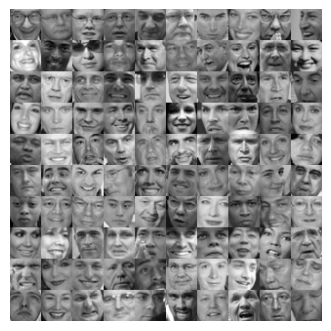

In [65]:
print_faces(faces, N=100)

### SVD on X

Perform SVD on X, identify the eigenfaces and plot the first few of them. Note that these 
eigenvectors correspond to eigenvalues with large values which together explains most of the 
variation in the data. Below are the first 36 eigenfaces. 

In [72]:
#I'll be using 70-30 split
indices = np.random.permutation(faces.shape[0])
training_idx, test_idx = indices[:70], indices[70:]
training_faces, test_faces = faces[training_idx,:], faces[test_idx,:]

In [101]:
average_face = np.mean(training_faces.T, axis=1)

In [110]:
average_face = np.mean(training_faces)
X = training_faces.T - np.tile(average_face,(training_faces.shape[1],1))

In [111]:
def sv_decomposition(matrix):        
    AtA = np.dot(matrix.T, matrix)
    eigenvalues, V = np.linalg.eigh(AtA)

    # Step 2: Sort eigenvalues and corresponding eigenvectors
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    V = V[:, idx]

    # Step 3: Compute singular values
    S = np.sqrt(eigenvalues)
    
    # Step 4: Compute left singular vectors U
    U = np.zeros((matrix.shape[0], matrix.shape[0]))
    for i in range(len(S)):
        U[:, i] = np.dot(matrix, V[:, i]) / S[i]
    
    return U, S, V.T

In [112]:
U, S, VT = sv_decomposition(X)

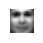

In [109]:
print_face(np.reshape(average_face,(32,32)).T)

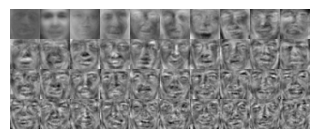

In [121]:
print_faces(U.T, N=40)